Name: Navya Chalamalasetty

# **Gem Stone Prediction**

The "Gem Stone Prediction" dataset includes comprehensive characteristics of cubic zirconia gemstones, offering important information for predictive modeling and statistical analysis. The dataset contains important details about the gemstones, including their physical dimensions (length, width, and height) and their carat weight, cut quality, color, clarity, depth, and table width.

## **Data Description:**

There are 10 columns in this dataset and it's description is given below-


*   **Carat:** The gem's carat weight.
*   **Cut:** Describes the gem's cut quality. The order of the quality ranges from Fair, Good, Very Good, Premium, and Ideal.
*   **Color:** Represents the color of the stone. With D being the best and J the worst.
*   **Clarity:** This refers to the absence of defects and inclusions in the gemstone, which affects its transparency and purity. It is rated from FL (flawless) to I3 (level 3 inclusions).
*   **Depth:** The height of a cubic zirconia divided by its average Girdle Diameter, as measured from the culet to the table.
*   **Table:** It is the width of the gem whic is represented as a percentage of the average diameter.
*   **X:** The cubic zirconia's length in millimeters.
*   **Y:** The cubic zirconia's width in millimeters.
*   **Z:** The cubic zirconia's height in millimeters.
*   **Price:** The cubic zirconia's price.

In [5]:
data <- read.csv("cubic_zirconia.csv")
head(data)

,carat,cut,color,clarity,depth,table,x,y,z,price
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.30,Ideal,E,SI1,62.1,58,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59,4.35,4.43,2.65,779
6,1.02,Ideal,D,VS2,61.5,56,6.46,6.49,3.99,9502


## **Data Cleaning:**

Data cleaning is a crucial step that has to be done before doing any type of analysis of the dataset because it guarantees that the data you're working with is precise and appropriately formatted for the analysis tasks you intend to carry out. Some of the key steps involve:


*   Ensuring the column names are in lower case and without spaces
*   Reordering columns (making sure the response variable is at the end)
*   Checking for missing values
*   Ensuring proper data types
*   Correcting any inconsistencies
*   Removing duplicates
*   Handling outliers
*   Ensuring the correct range and scale

In [6]:
dim(data)

[1] 26967    10

In [7]:
# Since all the columns are already in lower case, we need not convert again.
# Otherwise, we convert to lowercase and replace spaces with underscore to ensure readability

# Let's check for any null values if exists
null_vals <- colSums(is.na(data))
null_vals

carat     cut   color clarity   depth   table       x       y       z   price 
      0       0       0       0     697       0       0       0       0       0

In [8]:
# Replacing the null values of 'Depth' column with the mean
data$depth[is.na(data$depth)] <- median(data$depth, na.rm = TRUE)
dim(data)

[1] 26967    10

In [9]:
# Checking for duplicates if any and printing how many
total_dups <- sum(duplicated(data))
total_dups

[1] 34

In [10]:
cat("Before removing duplicates:", nrow(data), "rows and", ncol(data), "columns\n")

# Dropping the duplicates from the df
data <- data[!duplicated(data),]
cat("After removing duplicates:", nrow(data), "rows and", ncol(data), "columns\n")

Before removing duplicates: 26967 rows and 10 columns
After removing duplicates: 26933 rows and 10 columns


In [11]:
# checking the datatypes if they are accurate
for (i in names(data)){
  cat( i, "-", class(data[[i]]), "\n")
}

carat - numeric 
cut - character 
color - character 
clarity - character 
depth - numeric 
table - numeric 
x - numeric 
y - numeric 
z - numeric 
price - integer 


*   At this point, we do not have null values and
duplicate rows and seen that the datatypes are all accurate.
*   In the next steps, we will look for any outliers by plotting a boxplot. We have to ensure that there are no inconsistencies.


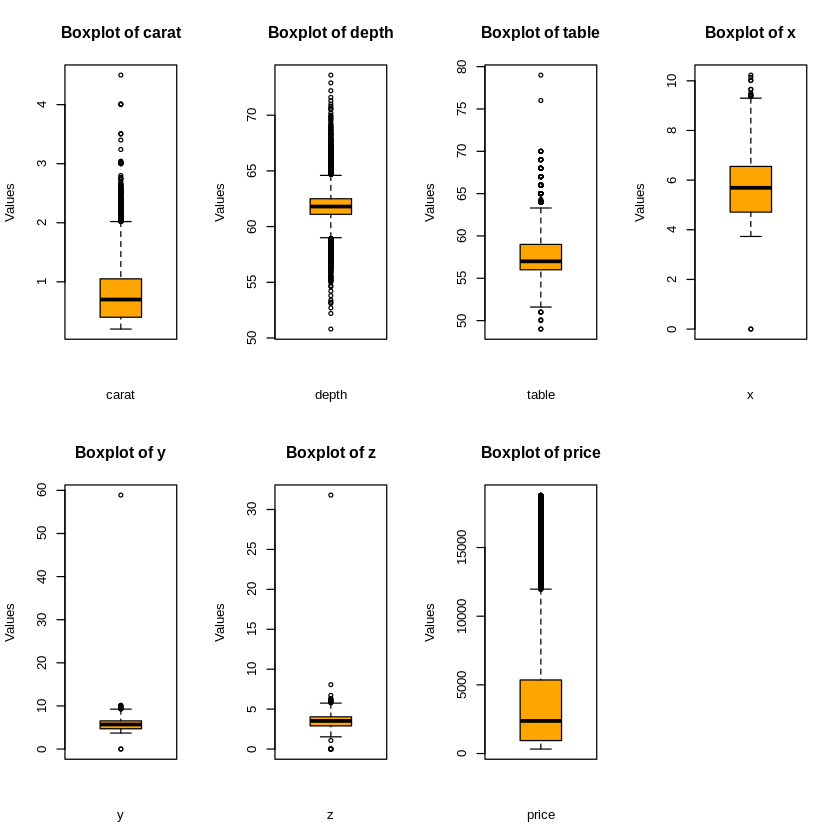

In [12]:
# We shall draw boxplots for all the numerical columns to look at any possible outliers.
cols_int <- sapply(data, is.numeric)
par(mfrow = c(2, 4))

# Iterate through every numerical column and plot a boxplot
for (i in names(data)[cols_int]) {
  boxplot(data[[i]],
  main = paste("Boxplot of", i),
  xlab = i, ylab = "Values", col = "orange")
}

Two important conclusions that can be made from the above boxplots are as below-

*   Looking at the plots for columns 'x','y','z', it's clear that some gems have '0' values as height / length/ width which is not ideal. So, we plan to either change these zero values to non-zero or delete them. I'm choosing to delete them because removing 9 rows out of 27,000 won't make much difference.

*   There exists outliers in the columns for 'y' and 'z' which might impact our analysis. So, I am replacing those values with the 'mode'.



In [13]:
# dropping the rows with '0' values in x,y,z columns.
data <- data[!(data$x == 0 | data$y == 0 | data$z == 0), ]
dim(data)

[1] 26925    10

In [14]:
# replacing the columns 'y' and 'z' with mode to nullify outliers
# as seen above, values > 40 in 'y' and values > 30 in 'z' will be dropped as there are two records

data <- data[!(data$y > 40 | data$z > 30), ]
dim(data)

[1] 26923    10

In [15]:
data_decoded <- data

Here, we aim to scale the data because of the sparseness of teh values in the dataset ranging from 400's to 18000's. So, scaling all the numerical columns between the range of 0 to 1.

In [16]:
# Scaling all the numerical columns in the range of 0 to 1 as the values are very widely spread
normalize = function(x) {
  return((x - min(x, na.rm = TRUE)) / (max(x, na.rm = TRUE) - min(x, na.rm = TRUE)))
}

data[cols_int] <- lapply(data[cols_int],normalize)
head(data)


,carat,cut,color,clarity,depth,table,x,y,z,price
,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02325581,Ideal,E,SI1,0.4956140,0.3000000,0.08307692,0.08992248,0.2814159,0.009355397
2,0.03023256,Premium,G,IF,0.4385965,0.3000000,0.10615385,0.11627907,0.2884956,0.035582955
3,0.16279070,Very Good,E,VVS2,0.5000000,0.3666667,0.35538462,0.37364341,0.4796460,0.322463768
4,0.05116279,Ideal,F,VS1,0.4736842,0.2333333,0.16769231,0.16899225,0.3345133,0.040882544
5,0.02558140,Ideal,F,VVS1,0.4210526,0.3333333,0.09538462,0.11162791,0.2796460,0.024497080
6,0.19069767,Ideal,D,VS2,0.4692982,0.2333333,0.42000000,0.43100775,0.5168142,0.496214579


## **Exploratory Data Analysis:**

This step is essential in understanding our data but not mandatory before starting any type of analysis. This helps exploring the patterns, distributions, dependencies of the target variable, or any kind of relationships within the data. Moreover,it mainly helps to determine how sparse the data is and finds out for any outliers. Hence this is a foundation step.

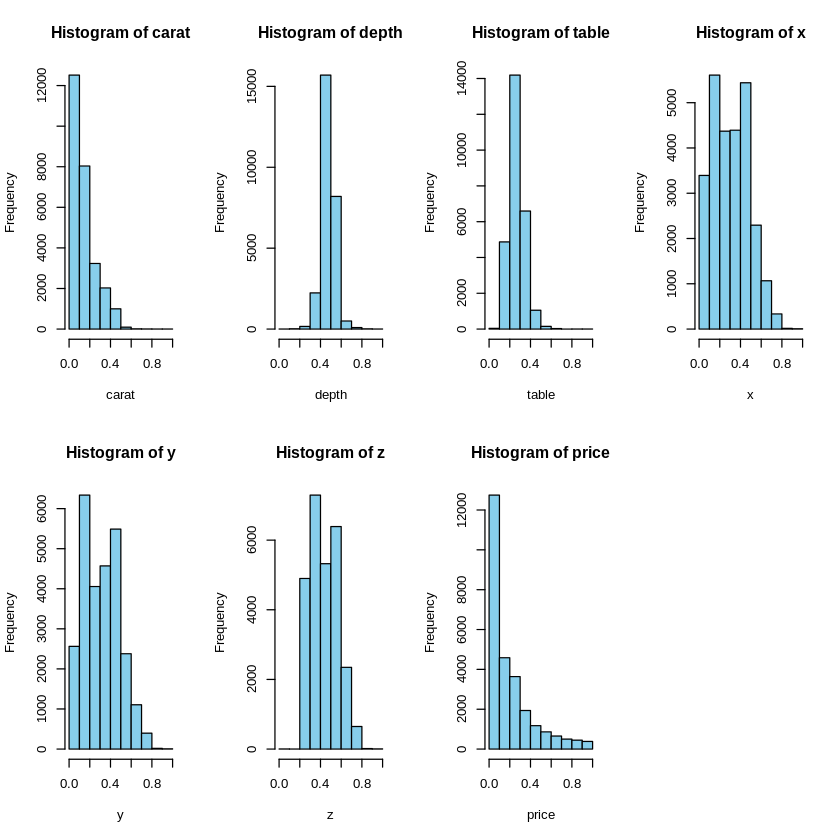

In [17]:
par(mfrow=c(2, 4))

for (col in names(data)[cols_int]) {
  hist(data[[col]],
       main = paste("Histogram of", col),
       xlab = col,
       ylab = "Frequency",
       col = "skyblue",
       breaks = 10)
}


Based on the above histograms for the numerical columns, we can conclude that:


1.   **Carat:** This is heavily right-skewed with majority of values grouped at the lower tail.

2.   **Depth:** `depth` seems to have bimodal distribution with two common depths at which stones are cut.

3.   **Table:** Looks like normally distributed, with a slight left skew.

4.   **X:** Appears to be right-skewed, with most of them generally small and fewer with longer length.
5.   **Y:** It's right-skewed. Similar to x, gemstones widths are mostly on the smaller side.

6.   **Z:** This is right-skewed, indicating smaller depths are more common.

7.   **Price:** This is extremely right-skewed, with most of the gemstones having lower prices and are more common than higher priced ones.




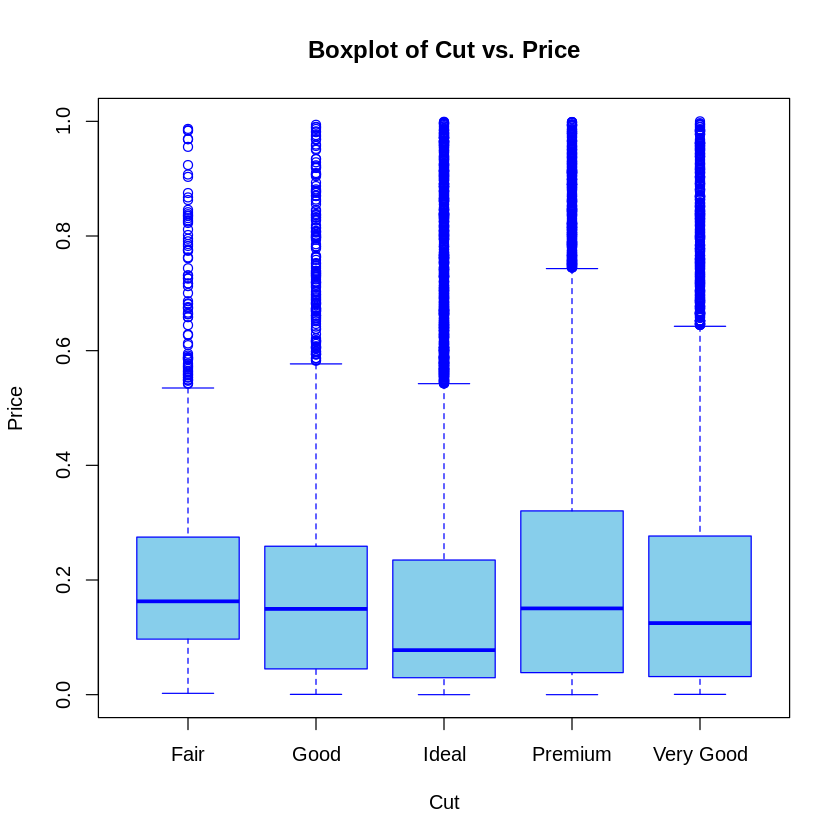

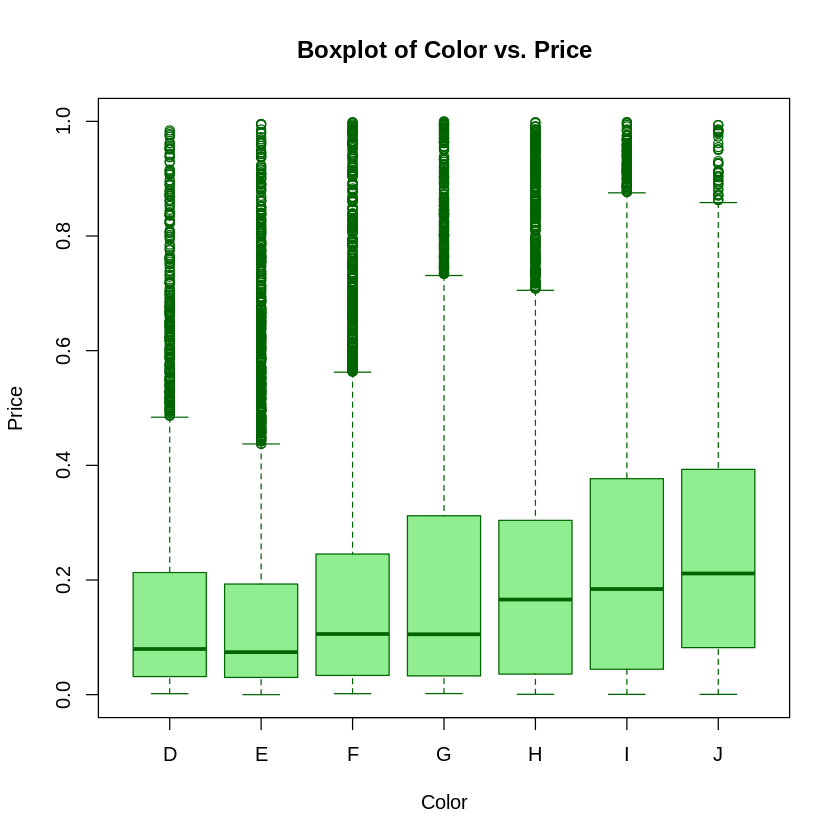

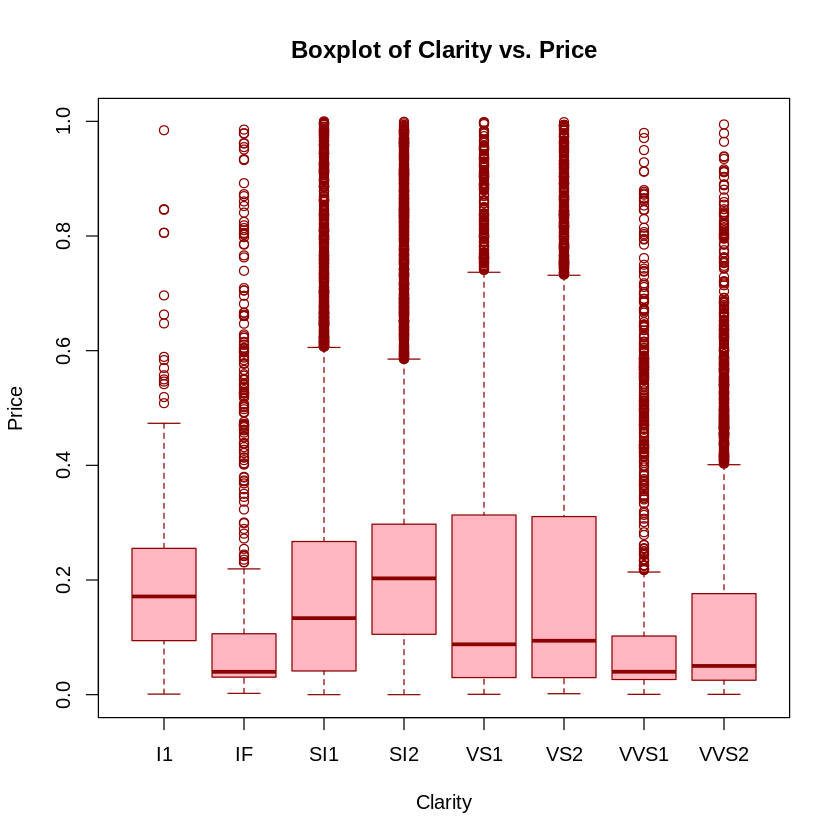

In [18]:
par(mfrow=c(1, 1))

# Box plot for cut vs. price
boxplot(price ~ cut, data = data, main = "Boxplot of Cut vs. Price", xlab = "Cut", ylab = "Price", col = "skyblue", border = "blue")

# Box plot for color vs. price
boxplot(price ~ color, data = data, main = "Boxplot of Color vs. Price", xlab = "Color", ylab = "Price", col = "lightgreen", border = "darkgreen")

# Box plot for clarity vs. price
boxplot(price ~ clarity, data = data, main = "Boxplot of Clarity vs. Price", xlab = "Clarity", ylab = "Price", col = "lightpink", border = "darkred")

*   From the above plots, it's clear that there are no outliers in the categorical columns i.e, cut, color and clarity wrt price.



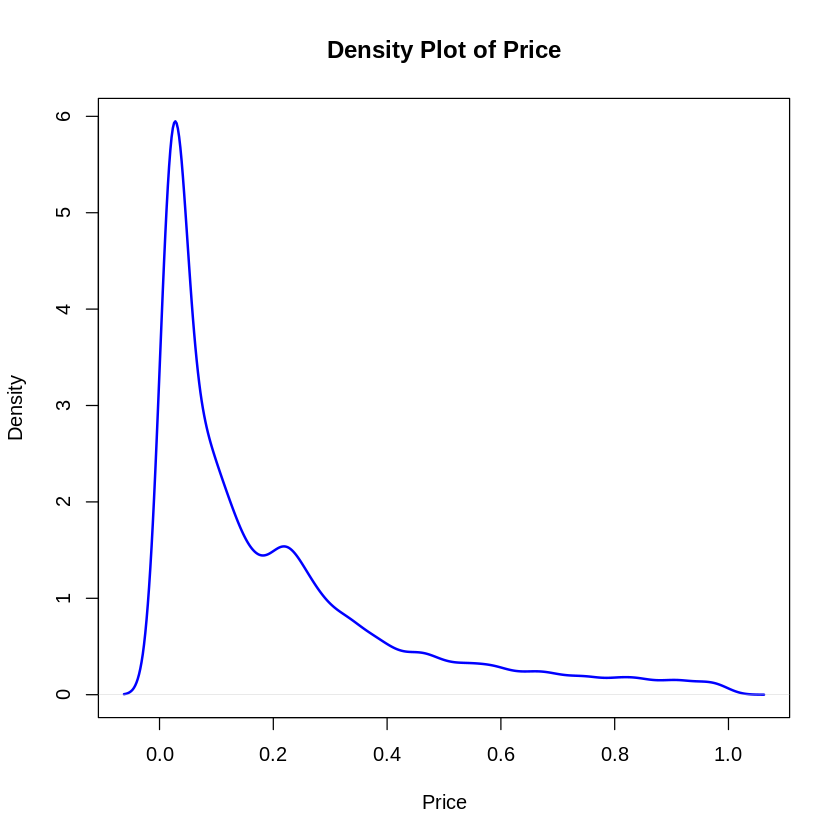

In [19]:
# Density plot for the  response variable (price) to see the skewness
density_price <- density(data$price)
plot(density_price, main="Density Plot of Price", xlab="Price", ylab="Density", col="blue", lwd=2)




*   The distribution of price seems to be right-skewed with most of the gemstones falling into lower price categories, indicating that lower-priced gemstones are far more common than higher-priced ones.



## **Data Transformation**

Some important transformations include feature scaling, one-hot encoding and splitting the data to test and train. We will perform each of these in the later steps below-


### **One-hot Encoding**

*   We now perform one-hot encoding as categorical variables are present in the dataset. This converts the categorical variables to dummy vars by removing the last column to avoid multicollinearity. Therefore, at the end the columns are transformed in such a way that the numerical columns remain as is and categorical are converted to its name followed by the value within it. For example, cut is a column with values good, verygood, fair, ideal and premium. These are now converted as cutIdeal, cutGood, etc.

In [22]:
install.packages("caret")
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘clock’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice



In [23]:
formula <- as.formula(paste("price ~ ."))

# Create dummy variables for categorical columns using dummyVars()
# Set fullRank = TRUE to avoid multicollinearity
dummy_vars <- dummyVars(formula, data = data, fullRank = TRUE)

data1 <- as.data.frame(predict(dummy_vars, newdata = data))
data1$price <- data$price
colnames(data1) <- gsub(" ", "_", colnames(data1))
head(data1)

,carat,cutGood,cutIdeal,cutPremium,cutVery_Good,colorE,colorF,colorG,colorH,colorI,⋯,clarityVS1,clarityVS2,clarityVVS1,clarityVVS2,depth,table,x,y,z,price
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.02325581,0,1,0,0,1,0,0,0,0,⋯,0,0,0,0,0.4956140,0.3000000,0.08307692,0.08992248,0.2814159,0.009355397
2,0.03023256,0,0,1,0,0,0,1,0,0,⋯,0,0,0,0,0.4385965,0.3000000,0.10615385,0.11627907,0.2884956,0.035582955
3,0.16279070,0,0,0,1,1,0,0,0,0,⋯,0,0,0,1,0.5000000,0.3666667,0.35538462,0.37364341,0.4796460,0.322463768
4,0.05116279,0,1,0,0,0,1,0,0,0,⋯,1,0,0,0,0.4736842,0.2333333,0.16769231,0.16899225,0.3345133,0.040882544
5,0.02558140,0,1,0,0,0,1,0,0,0,⋯,0,0,1,0,0.4210526,0.3333333,0.09538462,0.11162791,0.2796460,0.024497080
6,0.19069767,0,1,0,0,0,0,0,0,0,⋯,0,1,0,0,0.4692982,0.2333333,0.42000000,0.43100775,0.5168142,0.496214579




*   We then split this encoded data to 80% train and 20% test to perform the further steps like regression modeling.



In [24]:
set.seed(11111)
n = floor(0.8 * nrow(data1))
index = sample(seq_len(nrow(data1)), size = n)
train = data1[index, ]
test = data1[-index, ]

### **Research Question :-**

**"How do different physical and qualitative characteristics of gemstones influence their price, and to what extent can these influences be statistically quantified and modeled?"**

## **1)Regression Modeling:**

In [25]:
full_model <- lm(price ~ ., data = train)
summary(full_model)


Call:
lm(formula = price ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87623 -0.03146 -0.00979  0.02032  0.54404 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.161093   0.009927 -16.227  < 2e-16 ***
carat         2.714637   0.018822 144.223  < 2e-16 ***
cutGood       0.026354   0.002912   9.049  < 2e-16 ***
cutIdeal      0.040631   0.002886  14.081  < 2e-16 ***
cutPremium    0.037805   0.002754  13.727  < 2e-16 ***
cutVery_Good  0.033027   0.002812  11.746  < 2e-16 ***
colorE       -0.010101   0.001526  -6.620 3.67e-11 ***
colorF       -0.014134   0.001550  -9.120  < 2e-16 ***
colorG       -0.023883   0.001511 -15.805  < 2e-16 ***
colorH       -0.051964   0.001608 -32.317  < 2e-16 ***
colorI       -0.079806   0.001791 -44.568  < 2e-16 ***
colorJ       -0.129549   0.002184 -59.317  < 2e-16 ***
clarityIF     0.277168   0.004345  63.789  < 2e-16 ***
claritySI1    0.192764   0.003716  51.880  < 2e-16 ***
claritySI2 

In addressing our research question of how different physical and qualitative characteristics impact the gemstone prices, we first start with building a linear regression model.

From the results, we found that 'carat' weight was one of the most significant predictors, outperforming other variables with a coefficient of 2.714637 being the highest. This shows a strong statistically significant relationship between carat weight and gemstone price, also supported by a low p-value.

Additionally, 'clarityIF' is the second highest and most significant predictor after carat with coefficient of 0.277168. Conversely, the 'depth' attribute showed a p-value higher than the conventional 0.05 cutoff, indicating that depth might not statistically significantly affect the price in this model in contrast to carat and clarity.

Overall, with an R^2 value of 0.9227 and F-statistic with 1.116e+04 illustrates a strong fit and accurately captures the variance in gemstone prices.

## **2) Diagnostics of the model - goodness of fit, feature selection, residuals**

This step is to identify any discrepancies that may arise and which could possibly effect the accuracy of the linear regression model built previously.

**Goodness of Fit:**

This parameter is said to be concluded for a model based on the $R^2$ and adjusted $R^2$. Our model acquired $R^2$ value of 0.9227 indicating there is 92.7% of variability in price. Similarly, adj $R^2$ of 0.9226 which is very much closer to $R^2$ suggests that there is a very little loss for adding unwanted predictors. Thus, concluding this model as a best fit.

### **Feature Selection:**

Once the data has been cleaned, the next step is feature selection. Feature selection is the process of identifying which variables are most relevant to the target variable being predicted. In this step, we select features i.e, the predictor variables based on a significant alpha value of 0.05. This removes those variables whose p-values are greater than the alpha and keeps all other variables whose p-values are less than 0.05 in predicting the price. Additionally, we also calculate the mspe of the models starting with the full model and then mspe after removing the variables. Below is the code to perform the feature selection -

In [26]:
#function to calculate the MSPE
find_mspe <- function(model, test_data) {
  test_values <- test_data$price
  pred_values <- predict(model, newdata = test_data)
  mspe <- mean((test_values - pred_values)^2)
  return(mspe)
}

In [27]:
mspe_fm <- find_mspe(full_model, test)
cat("MSPE of full model is initially:", mspe_fm, "\n")

variables <- c(names(train)[-24])
model <- full_model
lowest_mspe <- mspe_fm
best_model <- full_model
alpha <- 0.05

for (var in variables) {
  # Calculate the p-values for the current model
  p_values <- summary(model)$coefficients[-1, 4]  # Exclude intercept

  if (max(p_values) > alpha) {
    # Identify variable to remove based on the highest p-value
    variable_to_remove <- names(p_values)[which.max(p_values)]
    # Updating the formula by removing the variable with the highest p-value
    formula <- as.formula(paste("price ~ ",paste(variables, collapse = " + "),"-", variable_to_remove))

    model <- update(model, formula, data = train)
    mspe_model <- find_mspe(model, test)

    cat("MSPE after removing", variable_to_remove, "column :", mspe_model, "\n")
    variables <- setdiff(variables, variable_to_remove)

    if (length(variables) == 0) break
  } else {
    break
  }
}
summary(model)

MSPE of full model is initially: 0.00376601 
MSPE after removing depth column : 0.00376856 



Call:
lm(formula = price ~ carat + cutGood + cutIdeal + cutPremium + 
    cutVery_Good + colorE + colorF + colorG + colorH + colorI + 
    colorJ + clarityIF + claritySI1 + claritySI2 + clarityVS1 + 
    clarityVS2 + clarityVVS1 + clarityVVS2 + table + x + y + 
    z, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.87944 -0.03150 -0.00978  0.02027  0.54409 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.165308   0.009636 -17.155  < 2e-16 ***
carat         2.716859   0.018781 144.658  < 2e-16 ***
cutGood       0.026094   0.002909   8.971  < 2e-16 ***
cutIdeal      0.039919   0.002857  13.971  < 2e-16 ***
cutPremium    0.037139   0.002728  13.613  < 2e-16 ***
cutVery_Good  0.032503   0.002796  11.624  < 2e-16 ***
colorE       -0.010107   0.001526  -6.624 3.59e-11 ***
colorF       -0.014124   0.001550  -9.113  < 2e-16 ***
colorG       -0.023851   0.001511 -15.784  < 2e-16 ***
colorH       -0.051945   0.001608 -32.305  < 2e

*  As seen above, since `depth` has a p-value greater than threshold alpha of 0.05, it has been removed by the model. Upon removal, our model achieved an mspe of 0.00376856 where in our full model has obtained an mspe of 0.00376601 which is even less than the reduced model.
*   Other important observation from the above results is that even after removal of depth from the model, there is no significant change in the metrics of $R^2$ and adjusted $R^2$. Moreover, we see that p-values for all the other features are lesser than 0.05 which is good suggesting that depth is not that significant in predicting the price.





**Interpretation of the results - Linear Regression Model:**

We will look into the each parameter followed by the observations:

1. **Coefficients(Estimate):**

Each coefficient here explains the expected change in the price for one unit change in the predictor variable, keeping all the other variables constant.

*   `carat`: This is the most significant and important variable of all in predicting the price as the coefficient is extremely large with approxiamtely 2.716 units.
*   `cut`: Being the categorical variable, R
defautly removes the first level of variable to avoid multicollinearity. In this case, `cutFair` was removed and it sets this as reference and compares the other categories i.e, cutGood, cutIdeal, cutPremium, cutVeryGood. This increased the price by 0.026,0.0939, 0.0371 and 0.0325 units respectively.  
*   `color`: Similarly, setting `colorD` as reference, all other colors show negative impact on price indicating that colorD is the most expensive category.
*   `x`, `y`, `z`: The negative coefficients for `x` and `z`indicate that when dimensions of x and z decrease the price increases i.e, these are inversely proportional whereas the dimension y is directly proportional to price.

2.   **R-squared:** This value 0.9227 indicates that approximately 92.27% of the variability in price can be explained by our model's predictors.

3.   **Adjusted R-squared:** This value (0.9226) is extremely close to the R-squared when the number of predictors in the model is taken into account,suggesting that there is a little loss for adding unnecessary predictors.
4.   **F-statistic and its p-value:** A very low p-value and a significant F-statistic suggests that atleast one predictor has a significant relationship with the response variable.

Overall, suggesting that the model we selected is a good fit for the data with a high variance in 'price'.





We now start analysing based on the diagnostic plots whether our model is following the MLR assumptions like linearity, normality, constant variance and independence.

In [28]:
yhat <- fitted(full_model)
residuals <- resid(full_model)
y <- train$price

### **Residuals vs Fitted Values:**


*   **Linearity** : To ensure linearity, the residuals must exhibit a random distribution with no discernible pattern along the horizontal axis.
*   **Homoscedasticity** : If the residuals are distributed equally across all levels of the fitted values, the assumption of constant variance is maintained.

`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


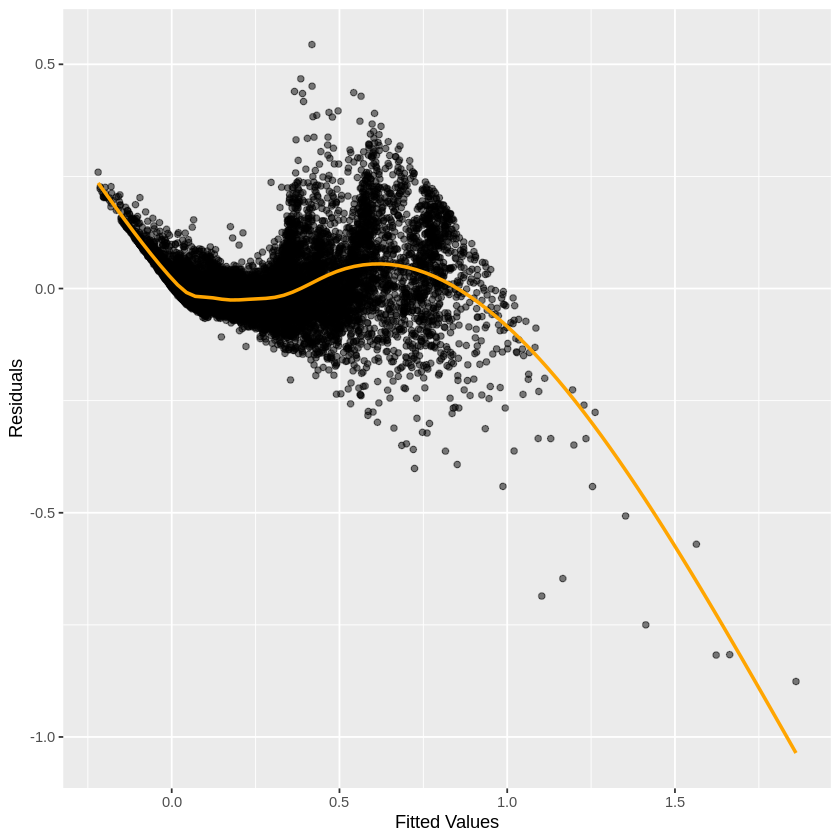

In [29]:
ggplot(train, aes(x = yhat, y = residuals)) +
    geom_point(alpha = 0.5) +
    geom_smooth(se = F, col = "orange") +
    xlab("Fitted Values") + ylab("Residuals")

**Linearity :** The above graph indicates that there may not be perfectly linear relationship between the predictors to the response, because the residuals here are not randomly spread across the horizontal line. Therefore, the model's linearity has been violated.

**Constant Variance :** Our model's constant variance is also violated as the residuals are not sparsely spread across all the levels of the fitted values. Since all the residuals are clustered at a single place, we violate this assumption as it follows heteroscedasticity.

### **QQ-Plot:**

A QQ-Plot is used to evaluate the normality of the residuals in the model. If the alignment of the data points follow the 45 degree line, then the model is said to follow normal distribution hence following the assumption of normality. Any deviations from this line indiacte non-normality.

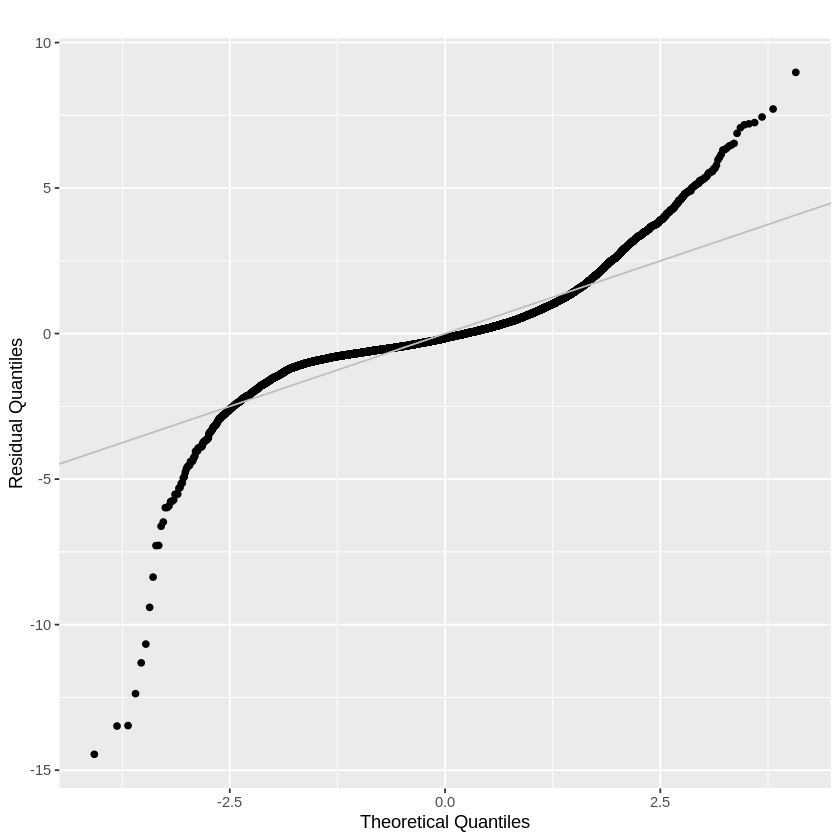

In [30]:
ggplot(train, aes(sample = (residuals - mean(residuals))/sd(residuals))) +
    stat_qq() + geom_abline(slope = 1, intercept = 0, col = "grey") +
    xlab("Theoretical Quantiles") +
    ylab("Residual Quantiles") +
    ggtitle("")


**Normality:** The residuals are not normally distributed, as the QQ-plot shown here shows a noticeable deviation from the predicted straight line, especially near the tails. Hence, normality is also violated.

## **Independence:**



`geom_smooth()` using method = 'gam' and formula = 'y ~ s(x, bs = "cs")'


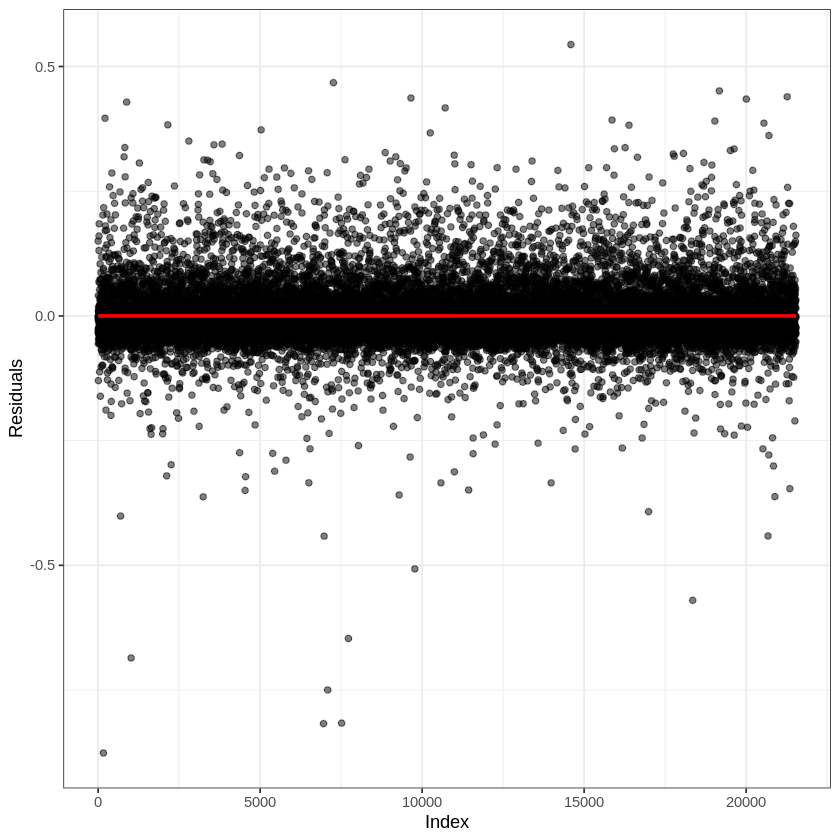

In [31]:
ggplot(train, aes(x = 1:length(price), y = residuals)) +
    geom_point(alpha = 0.5) +
    xlab("Index") +
    geom_smooth(se = F, col = "red") +
    ylab("Residuals") +
    theme_bw()

As seen above, there is no obvious pattern or trend in the residuals and it seems to be dispersed randomly around the horizontal line at zero, suggesting a great independence. Our model doesn't violate this assumption indicating that this criteria is satisfied.

This implies that the data's ordering does not introduce bias to the model, allowing to comprehend how gemstone characteristics are influenced by price.


### **3) Model Selection - BIC & Adjusted $R^2$**

We aim to calculate AIC, BIC, MSPE and Adjusted R2 on the model because they provide unique perspectives on model quality other than what's performed in Step 1.


In order to get other best models on our GEMSTONE dataset, we now perform Model Selection based on AIC, BIC, Adjusted R^2, MSPE using best subset regression method i.e, `regsubsets` considering all the possible combinations of predictors to determine which model predicts best on the response variable (price).

In [32]:
install.packages('leaps')
library(leaps)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [33]:
# Using regsubsets from leaps library to find the best models
nine_models <- regsubsets(price ~ ., data = train, nvmax = 23)
model_summary <- summary(nine_models)

In [34]:
df<-model_summary$which
head(df)

,(Intercept),carat,cutGood,cutIdeal,cutPremium,cutVery_Good,colorE,colorF,colorG,colorH,⋯,claritySI2,clarityVS1,clarityVS2,clarityVVS1,clarityVVS2,depth,table,x,y,z
1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE
6,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE


In [35]:
# Extracting the best models according to BIC
bic_bm <- which.min(model_summary$bic)
adjr2_bm <- which.max(model_summary$adjr2)

# Printing results
cat("Best model by BIC includes", bic_bm, "predictors.\n")

Best model by BIC includes 22 predictors.


In [36]:
# 22 predictors that impact BIC
colnames(df)

[1] "(Intercept)"  "carat"        "cutGood"      "cutIdeal"     "cutPremium"  
 [6] "cutVery_Good" "colorE"       "colorF"       "colorG"       "colorH"      
[11] "colorI"       "colorJ"       "clarityIF"    "claritySI1"   "claritySI2"  
[16] "clarityVS1"   "clarityVS2"   "clarityVVS1"  "clarityVVS2"  "depth"       
[21] "table"        "x"            "y"            "z"

From the above output, it indicates that the best model according to BIC includes 22 predictors. The dataframe `df` illustrates that TRUE indicates that those respective predictors are included in the best model.

The output of colnames(df) are the 22 predictors which includes the best BIC.

### **Model Selection - AIC and Adjusted $R^2$**

In [37]:
# Extracting the best models according to adj R2
adjr2_bm <- which.max(model_summary$adjr2)
cat("Best model by Adjusted R-squared includes", adjr2_bm, "predictors.\n")

Best model by Adjusted R-squared includes 23 predictors.


Best model by AIC has 23 predictors.


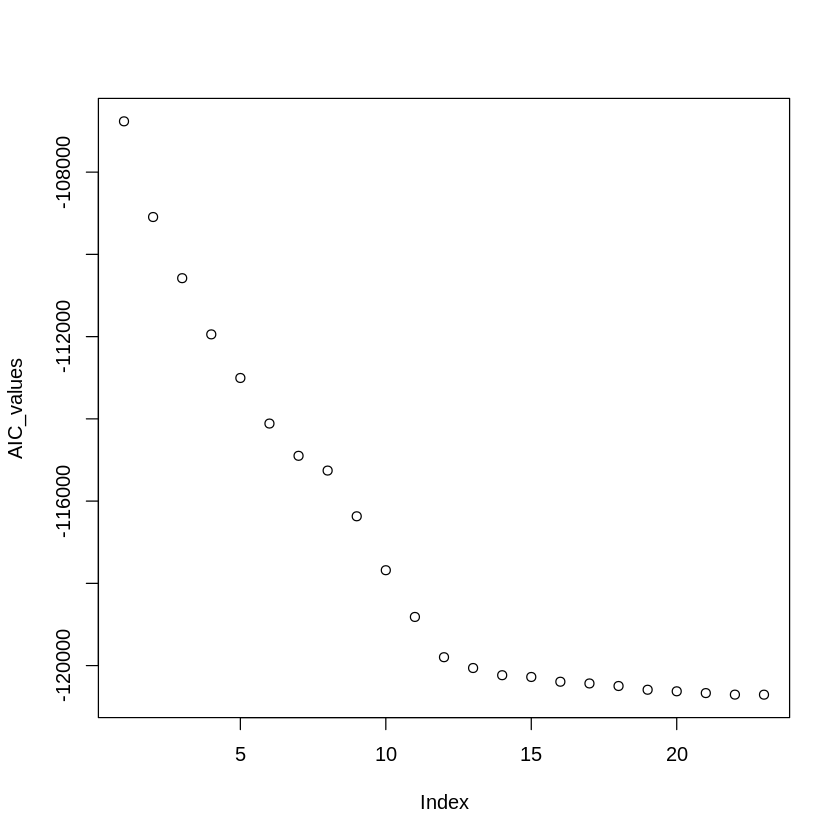

In [38]:
n <- nrow(train)

AIC_values <- 2 * (1:23) + n * log(model_summary$rss / n)
best_aic <- which.min(AIC_values)
plot(AIC_values)
cat("Best model by AIC has", best_aic, "predictors.\n")

In [39]:
# 23 predictors that impact Adjusted R^2 and AIC
colnames(df)[df[23,]][-1]

[1] "carat"        "cutGood"      "cutIdeal"     "cutPremium"   "cutVery_Good"
 [6] "colorE"       "colorF"       "colorG"       "colorH"       "colorI"      
[11] "colorJ"       "clarityIF"    "claritySI1"   "claritySI2"   "clarityVS1"  
[16] "clarityVS2"   "clarityVVS1"  "clarityVVS2"  "depth"        "table"       
[21] "x"            "y"            "z"

Similarly, Alkaline Information Criterion (AIC) and Adjusted $R^2$ resulted the best model utilizing all the 23 predictors for predicting the price from the train dataset. By comparing different combinations, the model with 23 predictors had the lowest AIC score. On the other hand, the model with highest Adjusted $R^2$ involves all predictors indicating that the model better captures the variance in the data.

## **Model Selection - MSPE**

In [40]:
compute_mspe <- function(train, test, a) {
  mspe_values <- numeric(length = 23)

  for (i in 1:23) {
    predictors <- colnames(a)[a[i,]][-1]
    formula <- as.formula(paste("price ~", paste(predictors, collapse = "+")))
    model <- lm(formula, data = train)
    test_subset <- test[, c("price", predictors), drop = FALSE]
    y_pred <- predict(model, test_subset)
    mspe_values[i] <- mean((test_subset$price - y_pred)^2)
  }

  return(mspe_values)
}

# Compute MSPE for each model size
mspe_values <- compute_mspe(train, test, df)
cat("The MSPE values for all the models:", "\n")
print(mspe_values)

# Find the best model with the lowest MSPE
best_model_index <- which.min(mspe_values)
cat("The best model with the lowest MSPE has", best_model_index, "predictors and an MSPE of", mspe_values[best_model_index], ".\n")


The MSPE values for all the models: 
 [1] 0.007135437 0.006414888 0.006104623 0.005732303 0.005570923 0.005254668
 [7] 0.005079982 0.005014599 0.004589180 0.004291210 0.004124353 0.003938732
[13] 0.003900877 0.003854399 0.003846348 0.003822728 0.003814965 0.003795581
[19] 0.003792362 0.003786214 0.003772083 0.003768560 0.003766010
The best model with the lowest MSPE has 23 predictors and an MSPE of 0.00376601 .


As seen above, after calculating the Mean Squared Prediction Error (MSPE) on all models, the lowest mspe has turned out to be 0.00376601 with all the 23 predictors involved i.e, for the full model indicating that this model is most precise in predicting the gemstone prices.



## $R^2$





In [41]:
find_r2 <- function(train, test, a) {
r2_values <- numeric(length = 23)

  for (i in 1:23) {
    labels <- colnames(a)[a[i,]][-1]
    formula <- as.formula(paste("price ~", paste(labels, collapse = "+")))
    model <- lm(formula, data = train)

    # Extract the R^2 value from the model summary
    model_summary <- summary(model)
    r2_values[i] <- model_summary$r.squared
  }

  return(r2_values)
}

# Compute R^2 for each model size
r2_values <- find_r2(train, test, df)
cat("The R^2 values for all the models:", "\n")
print(r2_values)

# Find the best model with the highest R^2
bmi_r2 <- which.max(r2_values)
cat("The best model with the highest R^2 has", bmi_r2, "predictors and an R^2 of", r2_values[bmi_r2], ".\n")


The R^2 values for all the models: 
 [1] 0.8519952 0.8671650 0.8760393 0.8836709 0.8892690 0.8948322 0.8986038
 [8] 0.9002886 0.9053143 0.9109150 0.9155018 0.9192645 0.9202514 0.9209039
[15] 0.9210688 0.9214982 0.9216584 0.9218905 0.9222267 0.9223714 0.9225341
[22] 0.9226759 0.9226870
The best model with the highest R^2 has 23 predictors and an R^2 of 0.922687 .


Similar to what we've done in Model Selection of MSPE, we performed a very similar approach here to calculate the $R^2$. We found the $R^2$ for all the models with varying no. of predictors and extracted the model with highest $R^2$ as the best model. And this best model has also included all the 23 predictors with highest $R^2$ value of 0.926687 which is nothing but the full model obtained in step 1. This suggests that all the predictor variables highly impact the prediction of response variable (price).

## **4) Generalized Linear Modeling:**

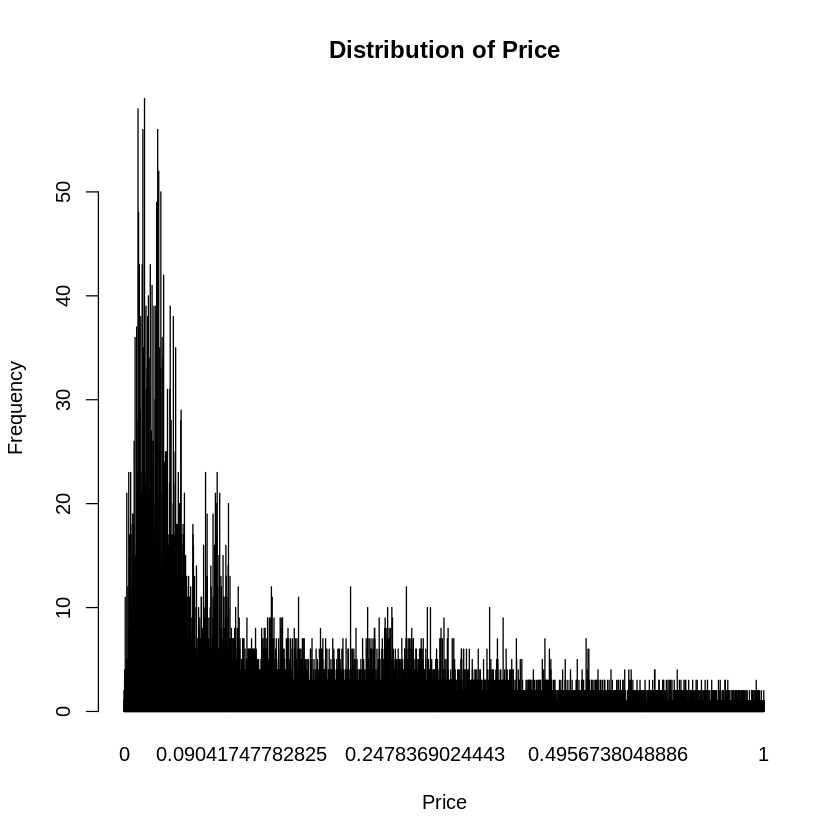

In [42]:
# Create a bar graph for the "price" variable
barplot(table(train$price), xlab = "Price", ylab = "Frequency", main = "Distribution of Price")

The response variable, price, has a skewed distribution, as indicated by the barplot, with a large number of observations clustered near a lower value and a tail extending towards higher values. For linear regression to work, the normality assumption is often violated by this skewness. When combined with a log link function, the Gamma distribution employed in the GLM provides a flexible option for modeling highly skewed data, including positive continuous data.




In [43]:
# checking if price contains zero values before fitting any GLM model
sum(train$price == 0)

[1] 2

In [44]:
# Deleting those rows by index which has zero values
train_df <- train[-which(train$price == 0), ]

In [45]:
install.packages('MASS')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [46]:
# library(MASS)
glm_model <- glm(price ~ ., family = Gamma(link = "log"), data = train_df)
summary(glm_model)

Warning message:
“glm.fit: algorithm did not converge”



Call:
glm(formula = price ~ ., family = Gamma(link = "log"), data = train_df)

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  -7.343618   0.035692 -205.751  < 2e-16 ***
carat        -9.174150   0.067685 -135.542  < 2e-16 ***
cutGood       0.043031   0.010471    4.110 3.98e-05 ***
cutIdeal      0.144343   0.010374   13.914  < 2e-16 ***
cutPremium    0.095494   0.009901    9.645  < 2e-16 ***
cutVery_Good  0.075106   0.010109    7.430 1.13e-13 ***
colorE       -0.077114   0.005486  -14.056  < 2e-16 ***
colorF       -0.145162   0.005572  -26.054  < 2e-16 ***
colorG       -0.231771   0.005433  -42.661  < 2e-16 ***
colorH       -0.363554   0.005781  -62.890  < 2e-16 ***
colorI       -0.513781   0.006438  -79.807  < 2e-16 ***
colorJ       -0.655424   0.007852  -83.472  < 2e-16 ***
clarityIF     1.347354   0.015622   86.249  < 2e-16 ***
claritySI1    0.619477   0.013358   46.374  < 2e-16 ***
claritySI2    0.428031   0.013420   31.894  < 2e-16 ***
clarityVS1

**Interpretation of the results:**

With p-values significantly below the 0.05 cutoff, the GLM results show that every coefficient is highly significant. 'Carat', in particular, has a notable large negative coefficient that, when re-transformed to the original scale, indicates a strong positive relationship with price within the context of the log link function. The clarity grades such as 'clarityIF' also have positive coefficients, suggesting that greater clarity translates into higher prices.


On the other hand, the residual deviance is less than the null deviance indicating that the model has a significant variablity in the data. Overall, the GLM adjusts to the skewed data by effectively capturing the impact of gemstone characteristics on price and offering an alternate method to linear regression when response variables are non-normal.

## **5) Confidence Interval:**

Confidence Intervals (CIs) are a range of values that are estimated from the data sample and considered to contain the true mean (average) of our population parameter (in this case, gemstone prices) with a certain probability. They provide a statistical estimate of where the true average price lies for gemstones with specific characteristics, like a certain carat weight or cut quality.

**What are we estimating here?**

We want to estimate the 95% confidence interval for the average price of gemstones based on their cut metrics (Fair, Good, Ideal, Premium, Very Good).

In [47]:
install.packages('dplyr')
library('dplyr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [49]:
# Calculating mean and standard error of the price for each cut category
cut_metrics <- data_decoded %>%
  group_by(cut) %>%
  summarise(
    mean_price = mean(price),
    sd_price = sd(price),
    count = n()
  ) %>%
  mutate(
    se_price = sd_price / sqrt(count),
    lower_bound = mean_price - qt(0.975, df=count-1) * se_price,
    upper_bound = mean_price + qt(0.975, df=count-1) * se_price
  )
cut_df <- as.data.frame(cut_metrics)
cut_df

cut,mean_price,sd_price,count,se_price,lower_bound,upper_bound
<chr>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
Fair,4565.769,3747.642,779,134.27322,4302.188,4829.350
Good,3927.075,3621.758,2434,73.41066,3783.121,4071.029
Ideal,3454.821,3869.199,10805,37.22277,3381.857,3527.784
Premium,4539.071,4315.006,6879,52.02579,4437.085,4641.058
Very Good,4032.610,4017.111,6026,51.74868,3931.164,4134.056


**Interpretation of the results:**

Above are the results obtained after constructing 95% confidence intervals for gemstone prices across the cut categories. From all, the cuts with Fair and Premium categories show highest average prices with 4,511.41 and 4522.962 respectively. Whereas, the gemstones with Ideal cut have a mean price of 3441.47 exhibit the most precision in price estimation, that's because of the larger sample size than all with (n=8661).

In conclusion, when validating against our research question if the characteristics of gemstones influence the price, it is clearly seen that the differences in the mean prices across the cut categories indicate that thcut quality is a highly significant factor affecting the gemstone prices.

## **6) Hypothesis Testing [F-test]**


*   **Null Hypothesis:**  The variances of the prices of gemstones are equal between color grades D and J.

*   **Alternative Hypothesis**: The variances of the prices of gemstones in color grade D is less than the variance in color grade J.

In [50]:
# Filtering the data wrt to color grades D and J
data_d = filter(data_decoded, color == "D")
data_j = filter(data_decoded, color == "J")

# Calculating variances
variance_d = var(data_d$price)
variance_j = var(data_j$price)

# Perform F-test
f_stat = variance_d / variance_j
p_value = pf(f_stat, df1 = nrow(data_d) - 1, df2 = nrow(data_j) - 1, lower.tail = TRUE)

# Printing the F-statistic and p-value
cat("F-statistic (Ration of Variances):", f_stat, "\n")
cat("P-value:", p_value, "\n")

if (p_value < 0.05) {
  cat("Reject the null hypothesis.\n")
} else {
  cat("Fail to reject the null hypothesis.\n")
}


F-statistic (Ration of Variances): 0.5806476 
P-value: 1.38144e-36 
Reject the null hypothesis.


**Interpretation of the results:**

When F-test is performed on the variances of gemstone prices between color grades D and J, it produced a very small F-statistic of 0.55822529 and an extremely low p-value of 8.641312e-30 which is very much less than the threshold value of 0.05. This result leads us to reject the null hypothesis, suggesting that a significant difference in variances of prices between color grades. These specifically show that the price variance in color grade D is less than the price variance in color grade J.

## **7) ANOVA**

Here, I am considering two models where model 2 indicates whether there is an effect of one predictor variable (cut, for example) on the response variable (price) depending on another variable (color). In contrast, model 1 without interaction indicates that effect of each predictor's (cut and color) effect on price stays the same, independent of the other predictor's values.

Checking the assumptions of anova if they satisfy or violate by plotting the graphs of 'Residual vs Fitted' for linearity and constant variance and QQ plot for normality.

### **Assumptions of ANOVA:**

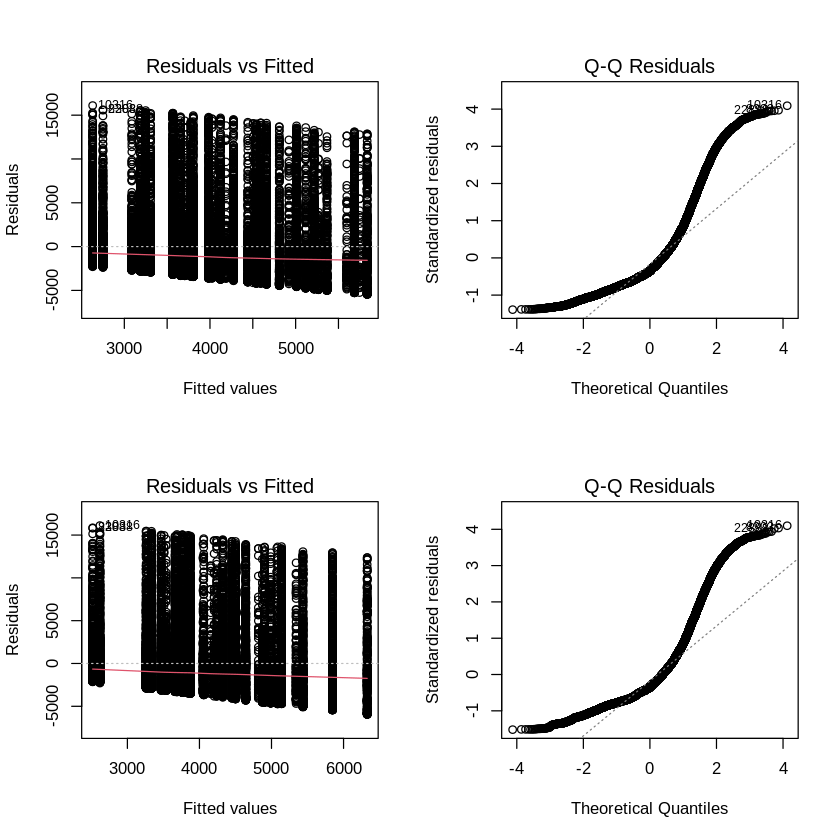

In [71]:
# m1 <- model without interaction between cut and color
# m2 <- model with interaction between cut and color
m1 <- lm(price ~ cut + color, data = data_decoded)
m2 <- lm(price ~ cut * color, data = data_decoded)


par(mfrow=c(2, 2))

# Residuals vs Fitted plot for m1
plot(m1,1)

# Normal Q-Q plot for m1
plot(m1,2)

# Residuals vs Fitted plot for m2
plot(m2,1)

# Normal Q-Q plot for m2
plot(m2,2)

**Interpretation of results:**



*   As seen above, considering the 'Residual vs Fitted' plot, both of these models are broadly dispersed around the zero line, but appears to be some increasing or clustered residuals pattern as the fitted values increase. This suggests potential heteroscedasticity, thus violating the constant variance.
*   There is a clear violation in normality, since the residual points deviate from the line especially at the ends.

I am using ANOVA despite the diagnostic plots' clear violations of the normality and homoscedasticity assumptions because the Central Limit Theorem guarantees that, given a large enough sample size, the means' sampling distribution tends to be normal, making ANOVA frequently robust against these violations. Furthermore, even if some assumptions are not fully met, the main focus is on determining whether the interaction between the variables (cut and color) significantly affects the response variable (price).




**ANOVA**


Conducting an ANOVA test between these two models will determine whether the inclusion of the interaction significantly enhances the model's ability to predict, thereby revealing whether the relationship between price and cut changes with gemstone color.

In [51]:
# Conduct the anova
result <- anova(m1, m2)
result

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,26912,416846759040,NA,NA,NA,NA
2,26888,415726247691,24,1120511348,3.019646,9.401138e-07


**Interpretation of the results:**

The results of the ANOVA show that there is a statistically significant difference between Models 1 and 2's predictive abilities for explaining gemstone prices. Model 2 with the interaction term between cut and color provides a significantly better fit to the data than Model 1, as shown by the F-statistic and related p-value (p < 0.001). This finding suggests that the interaction between cut and color plays a crucial role in understanding gemstone pricing.

# **REPORT**

## **Introduction**

This project closely examines the relationships between various physical and quantitative features of the gemstone with respect to each other. We mainly focus on how their dimensions, forms, colors, and levels of clarity affect their price. By using specific statistical techniques, we are able to determine which features are helpful in explaining these patterns and how they affect the price. For example, a gemstone's size, clarity, and other characteristics. By doing this, we can learn more about what makes these stones unique and improve our ability to predict prices.

### **Problem Statement:**
It states that - "How do different physical and qualitative characteristics of gemstones influence their price, and to what extent can these influences be statistically quantified and modeled?"

### **Objective:**

*   To investigate which attributes contribute to the price range in gemstones.
*   To estimate the price of gemstones based on similar attributes.
*   To determine the qualities that affect the cut of the stone.

**Interest in the Problem**

My interest in this topic of Gemstone Price Prediction rises from a fascination with the intricate details that delve into this to determine the value of each stone. Just like art, gemstones have various characteristic features like size, cut, color and clarity that uniquely define them and directly contribute to the price. The goal of this project is to investigate the complexities of these attributes and how they affect pricing as a whole. So, we use this dataset that details these features and apply certain statistical methods to quantify their impact on price which is exactly what our research question aims to do.

Overall, this project describes the reasons behind why some gemstones are more valued than others. Even if you consider the gemstones from the same family, the price differs based on cut, color or clarity. This way, I hope to provide some valuable insights that could be beneficial for enthusiasts, collectors and indistry experts. So, even if you are a layman without any knowledge in this industry, this project using statistical techniques will ensure you understand which features impact the price of the gemstone that you see in a random jewellery store.

### **Previous Work:**

There has been plenty of researchs already done on this topic utilizing this gemstone dataset to determine various methods like linear regression and other statistical methods. There seems to be lot of work done in Machine Learning using techniques like regularization and hyperparameter tuning to summarize the impact on price based on these features. One such other related work is on Kaggle where the linear regression is employed providing insights on the relationships between various attributes of gemstone to price.


**Data Collection**

We have collected the data from a well-known website called Kaggle, where lots of data enthusiasts share and examine various types of data and is an open source. This is an observational study and it was not an experiment that we conducted. Meaning, this data was gathered by someone with a lot of information about the gemstone- like color, cut and clarity to see how things affected their prices.

Link of the dataset: https://www.kaggle.com/datasets/colearninglounge/gemstone-price-prediction

The major question and aim of the project is always straightforward as mentioned earlier which is to find what factors/attributes affect the price of the gemstone.

## **Exploratory Data Analysis:**

We have plotted three seperate group of plots for numerical columns, categorical columns and the density plot for the response variable (price). Below are their respective plots and the inferences:

**1.   Histograms for the numerical columns-**
These graphs can provide an overview of the common sizes and proportions of the gemstones.Below are some insights drawn from each of the graph -

`carat` - Indicates that most of the stones are of smaller size suggesting that larger stones are rarer and influence the price due to scarcity.

`depth`& `table`- Similarly, the peak here indicates there is a standard depth in the stone which may indicate the preferred size ranges in the industry, thus affecting the price.

`x,y,z` -These graphs exhibit a very similar pattern indicating that these might correlate with price helping us know how the dimensions influence the price.


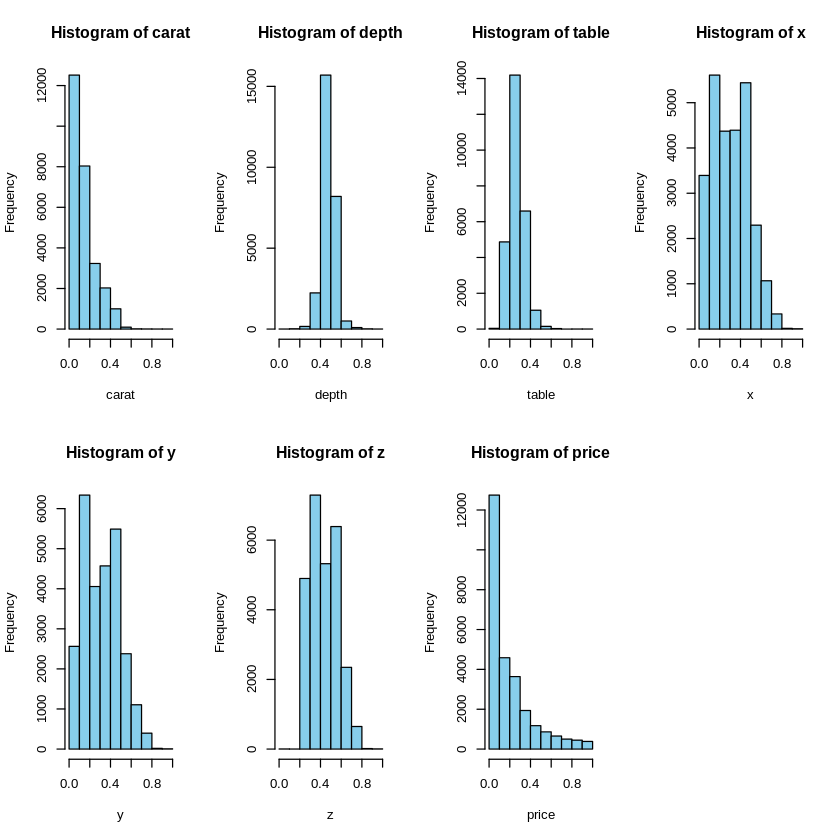

**2.   Categorical Columns - Boxplots:**
These boxplots were plotted for all the categorical columns like cut, color and clarity. It provides a clear vision of how these important qualities of the stone influence the pricing. For each type of cut and color, the price seems to vary suggesting that higher prices are for those gemstones which have specific type of cut and color. We might also see that gemstones with fewer blemishes (higher clarity grades) are generally priced higher which is expected. Let's see how these features influence price in depth at later part of the analysis.

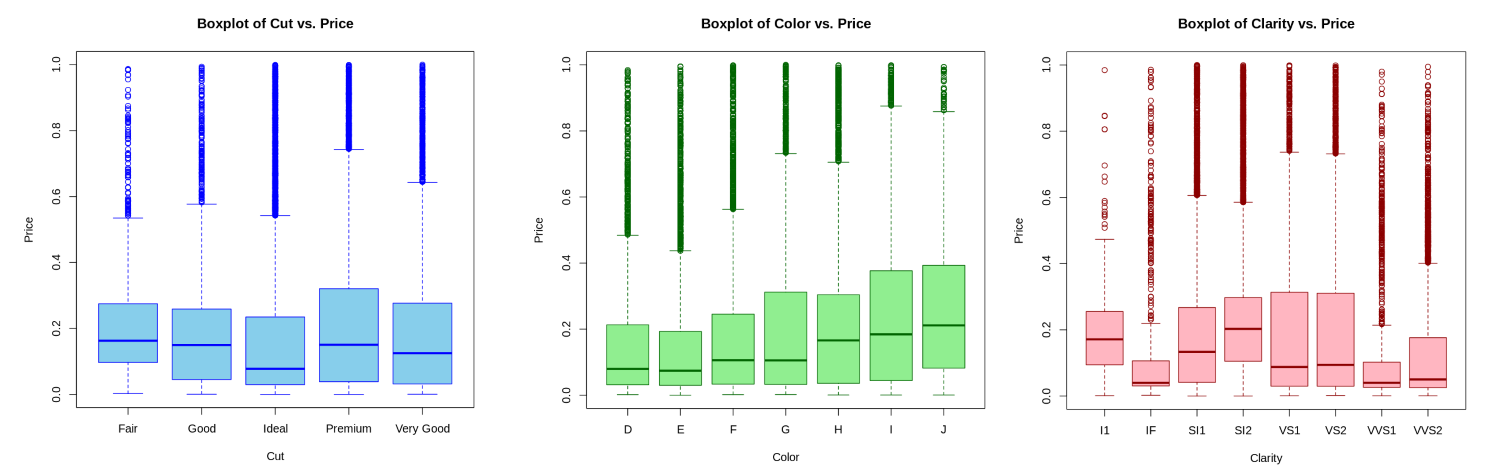


**3.   Density Plot of the response variable (Price):**

It's important to note that the variation in the density here is right-skewed and it is crucial to understand the overall distribution of price in the entire dataset. Since, this is skewed with a peak at the lower end, it seems like most affordable gemstones are commonly available while high-priced ones are fewer.

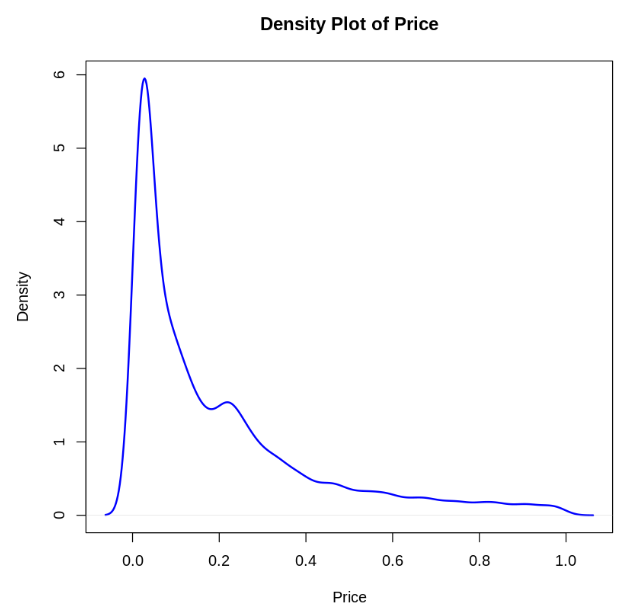

# **Statistical Analaysis and Results:**

For each of the type of analysis used, I will be describing it and the interpretations made out of it. Let's begin with Linear Regression Model-

### **Linear Regression Modeling -**

**Objective:**  The goal of our research is to comprehend the relationship between market prices and the different physical and qualitative attributes of gemstones, such as carat, cut, color, and dimensions. Through the statistical technique of linear regression, we have measured the degree to which these characteristics affect the price and aid in price prediction in the valuation of gemstones.


From the linear regression analysis, several important insights regarding the factors influencing gemstone prices were obtained.Price increases significantly for every unit increase in carat, indicating that carat is a key factor in pricing. Variations in cut also matters, for example, gemstones with 'Ideal' cut are more expensive than those with the baseline 'Fair' cut. Similarly, color and dimensions also influence price negatively relative to the reference, suggestung that market prefers only certain colors and dimensions highly. Overall, the model was successful in predicting the price with mspe of 0.00376601 which is quite good, R-squared of 0.9227 indicating the variablity in price, confirming the effectiveness of this model. These findings are essential for someone who is interested in this field to make wise decisions about stock selection or gemstone pricing strategies.

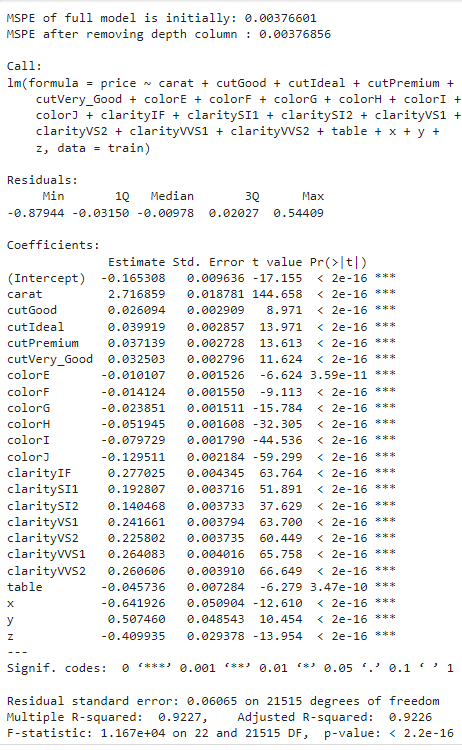

### **Understanding the Model Assumptions :**

In our analysis of how gemstone characteristics influence their price, we utilized a statistical approach to predict price variations based on physical and qualitative features like carat, cut, color, and clarity.

*   **Linearity:** Ideally, changes in price should be consistent and predictable when attributes like carat or clarity change. But this assumption stated that this isn't always the case as there is some degree of nonlinearity in the features to price.

*   **Constant Variance:** We believe that, at all price points, the differences (residuals) between our predicted and actual prices will be almost equal. Unfortunately, our research revealed that these variations are not constant, with certain predictions of prices being more accurate than others.

*   **Normality:** The residuals should ideally follow a normal distribution, with few residuals being extremely high or low and the majority being close to zero, in order for our model to perform the best. Deviations were evident in our analysis, particularly at extreme values, which may indicate that some predictions are systematically incorrect.

*   **Independence:** This assumption proved to be correct; prices don't appear to be impacted by the order in which the data is gathered. This is positive because it indicates that the arrangement of the data has no impact on the predictions made by our model.




### **Model Selection based on AIC, BIC, Adjusted $R^2$, $R^2$, MSPE**

Building upon this, we engaged in a thorough model selection process to refine our understanding and ensure the robustness of our predictive model.We evaluated every possible combination of predictors using the best subset regression technique, which can be carried out by using the "regsubsets" function from the leaps library. Using a variety of criteria, this approach enabled us to determine which models were the best:


*   **AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)** were employed to evaluate the goodness of fit and model simplicity. BIC indicated that a model with 22 predictors was the best fit, indicating a balance between model complexity and fit. Our model's ability to explain variance in gemstone prices was measured by Adjusted R² and this used all 23 predictors, indicating a thorough capture of price variability.
*   **Adjusted R²** provided insight amount of variance in gemstone prices that the model acquired i.e, with 23 predictors.

Additionally **Mean Squared Prediction Error (MSPE) and $R^2$** for each model were calculated. The best one, with the lowest MSPE and highest $R^2$ also included with 23 predictors with values 0.00376601 and 0.926687 respectively.

Overall, our model incorportaing with all the 23 predictiors provided a great fit for understanding the pricing. As shown by its low MSPE and high Adjusted R², this model not only ensures high predictive accuracy but also captures the complex connections between various gemstone characteristics.




###**Generalized Linear Modeling**

An essential step in carrying out the GLM was investigating the response variable (price) distribution using a density plot.

The distribution of our response variable, price, is shown in the image below -


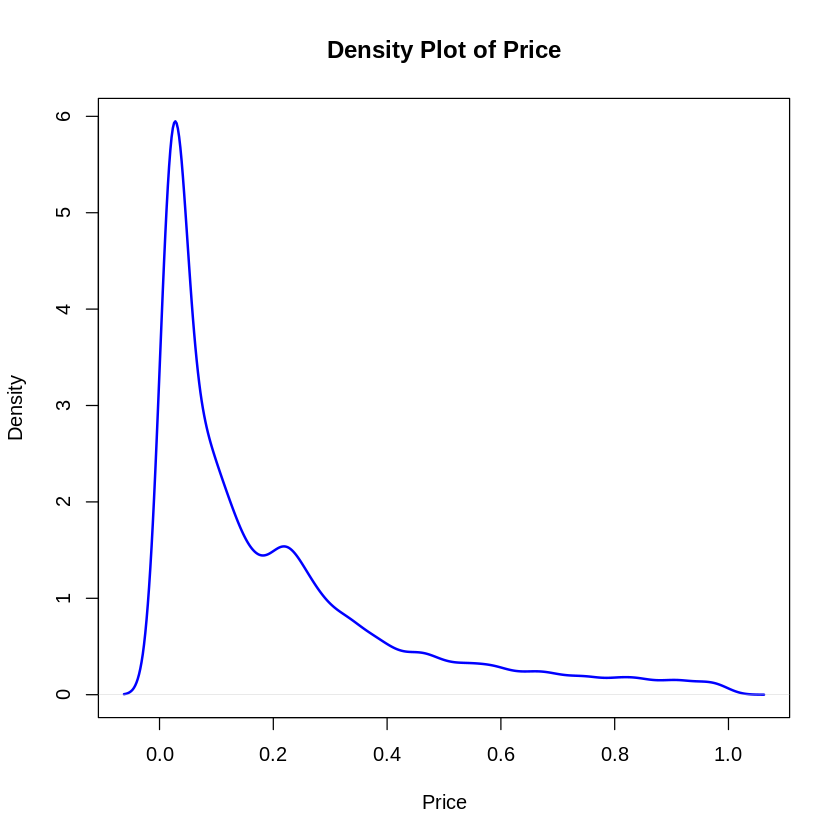

Results of the Genaralized Linear Model when summary is printed is as below-

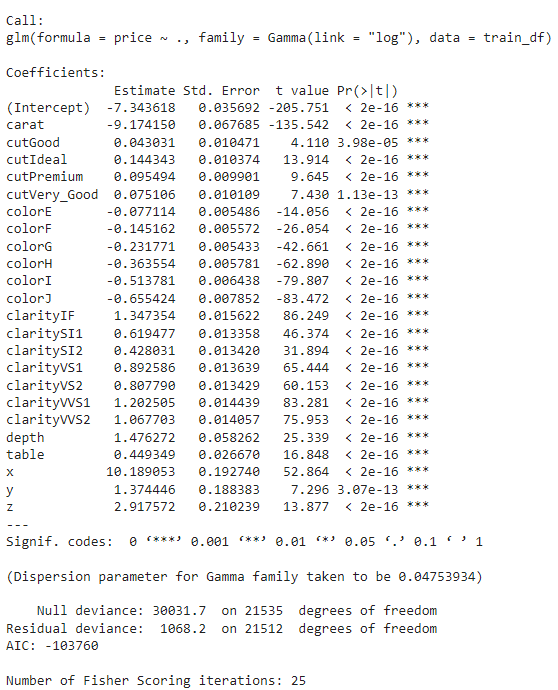

A GLM was used to overcome linear regression's assumptions violations. This model, using a Gamma distribution with a log link, is well-suited for our non-normal data. These results confirmed that all factors have a significant impact on prices, with "carat" having a clearly positive impact after being adjusted for the log transformation of the model. This implies that gemstone prices are significantly higher for larger carats. Another important factor is clarity, where higher grades of clarity are correlated with higher prices.

 The analysis's insights not only aid in pricing strategies but also improve the understanding of the essential characteristics that determine gemstone values, enabling buyers and sellers to make well-informed decisions.



### **Confidence Interval**

The below image is the 95% confidence interval table for gemstone prices across the cut categories -

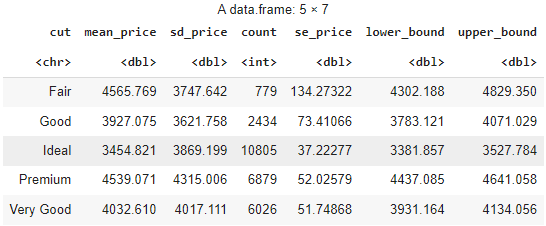

To deepen our understanding of how the stone's characteristics influence the price, in this case, we considered one of the predictor variable which is 'cut' and computed the 95% confidence interval for the average prices based on the categories of cut quality of the gemstone. Confidence interval is the range that the true mean price for each cut category falls into, within which we can be 95% confident. This statistical analysis confirms that, out of all, the cuts with **Fair** and **Premium** categories show highest average prices with 4,511.41 and 4522.962 respectively. Whereas, the gemstones with Ideal cut have a mean price of 3441.47 exhibit the most precision in price estimation, that's because of the larger sample size than all with (n=8661).


### **Hypothesis Testing Using F-test on Gemstone Pricing**

We used an F-test to examine the differences in price between gemstones of color grades D and J in order to learn more about how the characteristics of gemstones affect their price. The alternative hypothesis proposed that the variance in color grade D is smaller than that in color grade J, while the null hypothesis maintained that the price variances between these color grades are equal.

**Results:**
The analysis yielded a remarkably low p-value of 1.38144e-36 and an F-statistic of 0.5806476. There is a significant difference in the variances between the two color grades, which leads us to reject the null hypothesis. This demonstrates that there is a clear difference in price variability depending on color quality, with gemstones of color grade D showing a smaller price variance than those of color grade J. It highlights that not only do different colors impact price levels but also the consistency of those prices. This kind of insight is essential for creating focused sales strategies and efficiently controlling inventory levels.


### **Advanced Analysis with ANOVA**

We carried out an ANOVA test comparing two statistical models to determine the effect of gemstone cut and color on pricing, both independently and interactively, as part of our ongoing efforts to analyze the complexities of gemstone pricing.

**Methodology:**

We built two models:

*   Model 1 (M1): evaluates the effect of cut and color on price without considering any interaction between these factors.
*   Model 2 (M2): includes an interaction term between cut and color, hypothesizing that the effect of cut on price varies with the gemstone's color.

Below are the results obtained for the above-


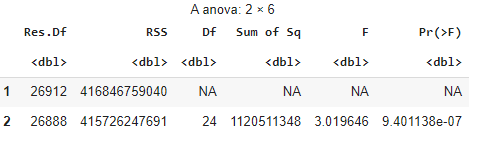

**Results:**

Between the two models' abilities to explain the variance in gemstone prices, the ANOVA results showed a statistically significant difference. A strong F-statistic and a highly significant p-value (p < 0.001) indicate that Model 2, which is the interaction between cut and color, showed a noticeably better fit.

This important result highlights how important it is to take into account the combined effects of color and cut when determining the value of gemstones. It is possible that different cut and color combinations can have intricate effects on gemstone value, as pricing is heavily influenced by the interaction between these characteristics.


## **Conclusions**

Throughout this thorough research, we used a range of statistical methods to investigate the ways in which different attributes of gemstones impact their price. To measure the influence of characteristics like carat, cut, color, and clarity, we first constructed linear and generalized linear models. Carat size was found to have the greatest significant influence on prices among the key attributes highlighted in these models. We then extended our analysis by performing hypothesis testing to investigate pricing variances between various color grades and by computing confidence intervals to estimate the average prices based on cut quality. Additionally, the interaction between cut and color was evaluated using an ANOVA test, which supported the idea that these variables have an interdependent effect on gemstone prices.

**Learnings:**

The series of analyses offered significant insights into the dynamics of the gemstone market in addition to providing a response to our research question. It has been observed that the pricing of gemstones is a complex matter that is impacted by a wide range of factors. The way these factors interact can greatly improve our comprehension and ability to make predictions. Offering stakeholders a comprehensive road map for making informed decisions in the gemstone industry, this holistic approach has highlighted the significance of taking into account a variety of factors and their interrelationships when evaluating gemstone values.


### **Further Study:**

Below are some of the accessible wys to expand the research in this area:


*   **Expanding Features:** Adding some more features to include more attributes like symmetry of the stone, polish, origin etc to understand their impact on pricing.

*   **Time Series Analysis:** Investigate how prices change over the years to identify trends and seasonal effects on gemstone pricing.

*   **Comparision:** Comparing pricing strategies between natural and synthetic stones or comparing between online and retail prices to see if it impacts the current market trends.

*   **Consumer Analysis:** Understanding the consumer's preferences like which gemstone qualities they value the most is important.

*   **Simple Regression Models:** Use basic regression techniques to explore how multiple factors together influence gemstone pricing.

The results would be beneficial to marketers and customers in the gemstone sector, as these simple extensions would offer real-world insights into the variables influencing gemstone prices.


## **References**

Below references are the lecture notes taught by professor in class

1.   Lecture 25 - Code Model Selection in R
2.   Anova solutions
3.   Diagnostic plots in R taught by professor in class
4.   Hypothesis testing, confidence intervals and statistical tests.
5.   Homework 5 submitted by me
6.   https://medium.com/@sawant.prana/combine-data-cleaning-feature-selection-modeling-and-interpretability-a19f6991f8f3